In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import calendar as cd
import ipywidgets as widgets
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

In [2]:
# Cleaning & EDA for listings.csv file 

# Load csv file into df
listings_full = pd.read_csv("listings.csv")

# Select relevant columns into new df
listings = listings_full[['id', 'name', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 
                    'accommodates', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'cancellation_policy',
                    'review_scores_rating',	'review_scores_accuracy',	'review_scores_cleanliness',	'review_scores_checkin',	'review_scores_communication',	
                    'review_scores_location',	'review_scores_value', 
                    'price']].copy()

# Convert column types
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Investigate null values
print(listings.notna().all(axis=1).sum())


3140


<ipython-input-2-cbd7927ff129>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [3]:
# Descriptive statistics of numerical columns
numerical_columns = ['id', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 
                    'review_scores_rating',	'review_scores_accuracy',	'review_scores_cleanliness',	'review_scores_checkin',	
                    'review_scores_communication',	'review_scores_location',	'review_scores_value']
listings_column_stats = listings[numerical_columns].describe()
listings_column_stats.loc['variance'] = listings[numerical_columns].var().tolist()
listings_column_stats.loc['skewness'] = listings[numerical_columns].skew().tolist()
listings_column_stats.loc['kurtosis'] = listings[numerical_columns].kurtosis().tolist()
listings_column_stats.to_csv('listings_column_stats.csv')
print(listings_column_stats)

                    id     latitude    longitude  accommodates    bathrooms  \
count     3.818000e+03  3818.000000  3818.000000   3818.000000  3802.000000   
mean      5.550111e+06    47.628961  -122.333103      3.349398     1.259469   
std       2.962660e+06     0.043052     0.031745      1.977599     0.590369   
min       3.335000e+03    47.505088  -122.417219      1.000000     0.000000   
25%       3.258256e+06    47.609418  -122.354320      2.000000     1.000000   
50%       6.118244e+06    47.623601  -122.328874      3.000000     1.000000   
75%       8.035127e+06    47.662694  -122.310800      4.000000     1.000000   
max       1.034016e+07    47.733358  -122.240607     16.000000     8.000000   
variance  8.777357e+12     0.001853     0.001008      3.910900     0.348536   
skewness -3.097820e-01    -0.249852    -0.206868      1.695584     2.909350   
kurtosis -1.104197e+00    -0.131702    -0.404318      4.380294    13.865493   

             bedrooms         beds        price  re

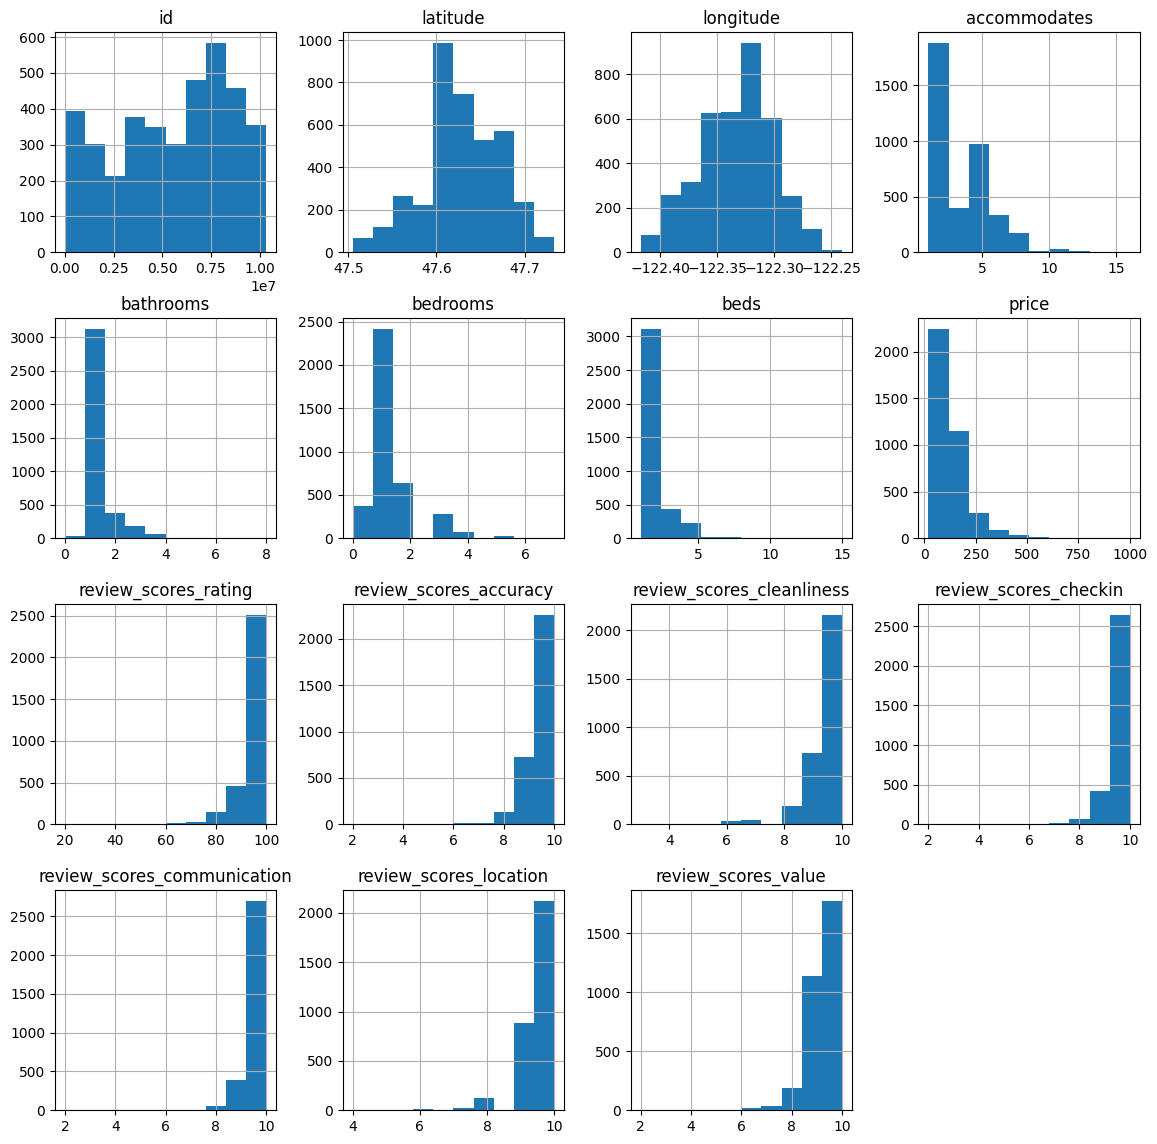

In [4]:
# Histograms of numerical columns
listings[numerical_columns].hist(figsize=(14,14))
plt.show()

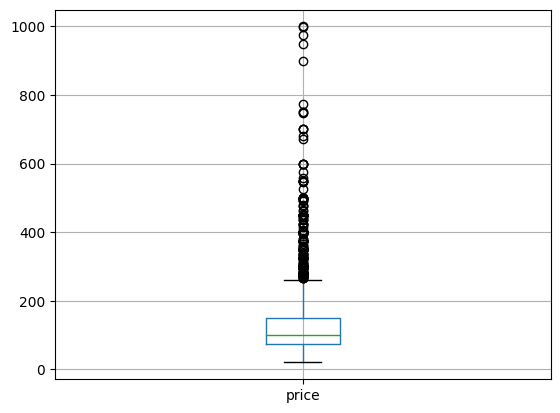

262.5
246


In [5]:
# Boxplot of price
listings.boxplot('price')
plt.show()

Q1 = listings['price'].quantile(q=0.25)
Q3 = listings['price'].quantile(q=0.75)
IQR = Q3 - Q1
top_whisker = Q3 + 1.5*IQR
bottom_whisker = Q1 - 1.5*IQR
outliers = listings[listings['price'] > top_whisker]
print(top_whisker)
print(len(outliers))



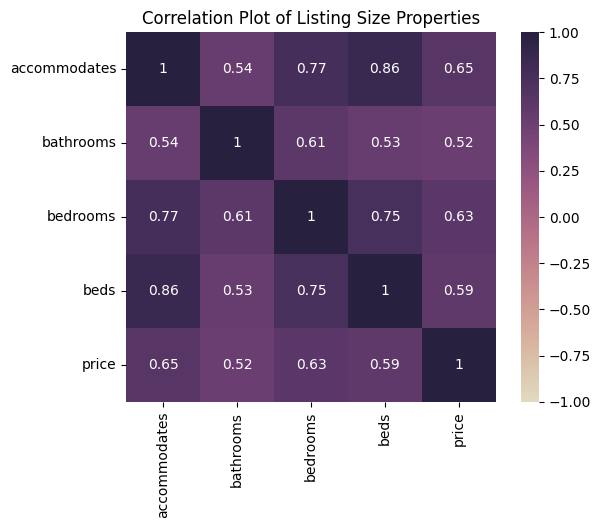

In [6]:
# Correlation matrices of numerical columns
listing_attributes_corr = listings[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']].corr()
sns.heatmap(listing_attributes_corr,
    vmin=-1, vmax=1, center=0,
    annot=True,
    cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),
    square=True)
plt.title('Correlation Plot of Listing Size Properties')
plt.show()

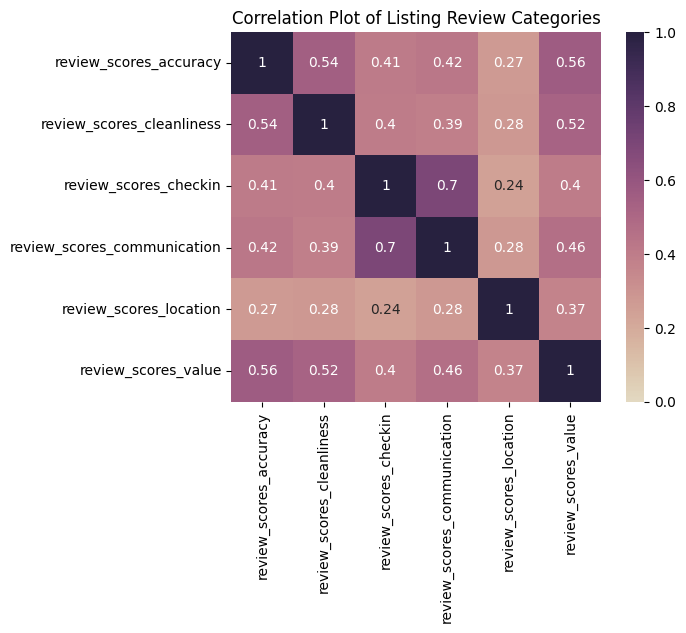

In [7]:
listing_reviews_corr = listings[['review_scores_accuracy',	'review_scores_cleanliness',	'review_scores_checkin',	
                    'review_scores_communication',	'review_scores_location',	'review_scores_value']].corr()
sns.heatmap(listing_reviews_corr,
    annot=True,
    cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),
    square=True, 
    vmin=0)
plt.title('Correlation Plot of Listing Review Categories')
plt.show()

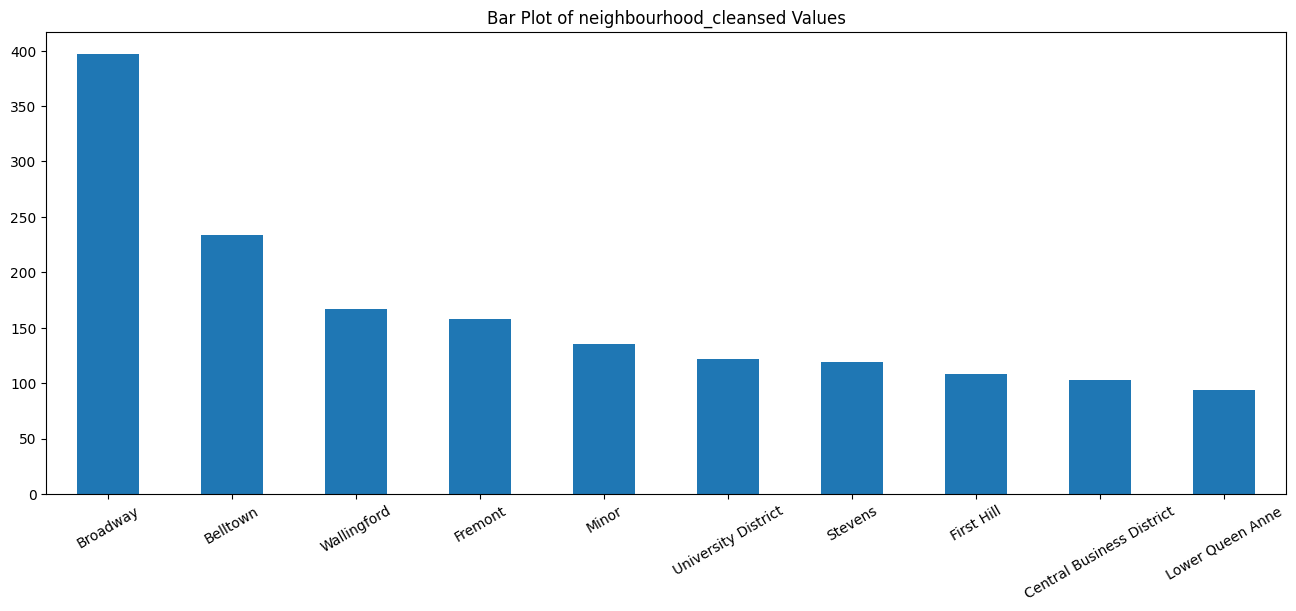

In [8]:
# Barplots of categorical variables
categorical_columns = ['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']
listings['neighbourhood_cleansed'].value_counts()[:10].plot.bar(rot=30, figsize=(16, 6))
plt.title('Bar Plot of neighbourhood_cleansed Values')
plt.show()

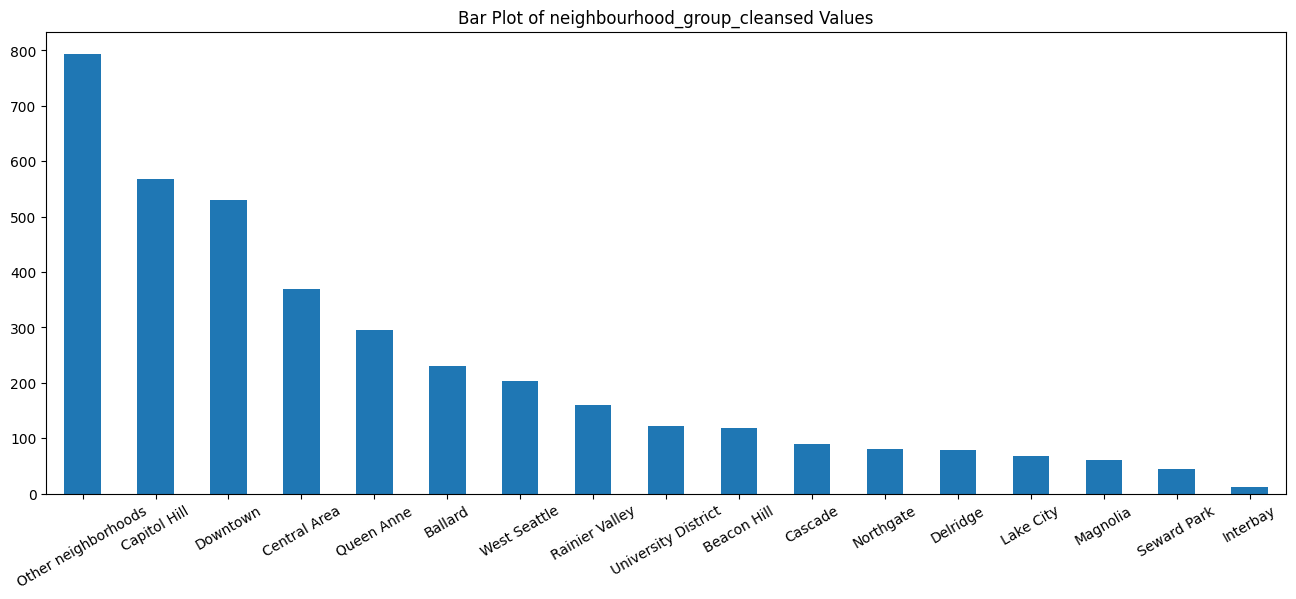

In [9]:
listings['neighbourhood_group_cleansed'].value_counts().plot.bar(rot=30, figsize=(16, 6))
plt.title('Bar Plot of neighbourhood_group_cleansed Values')
plt.show()

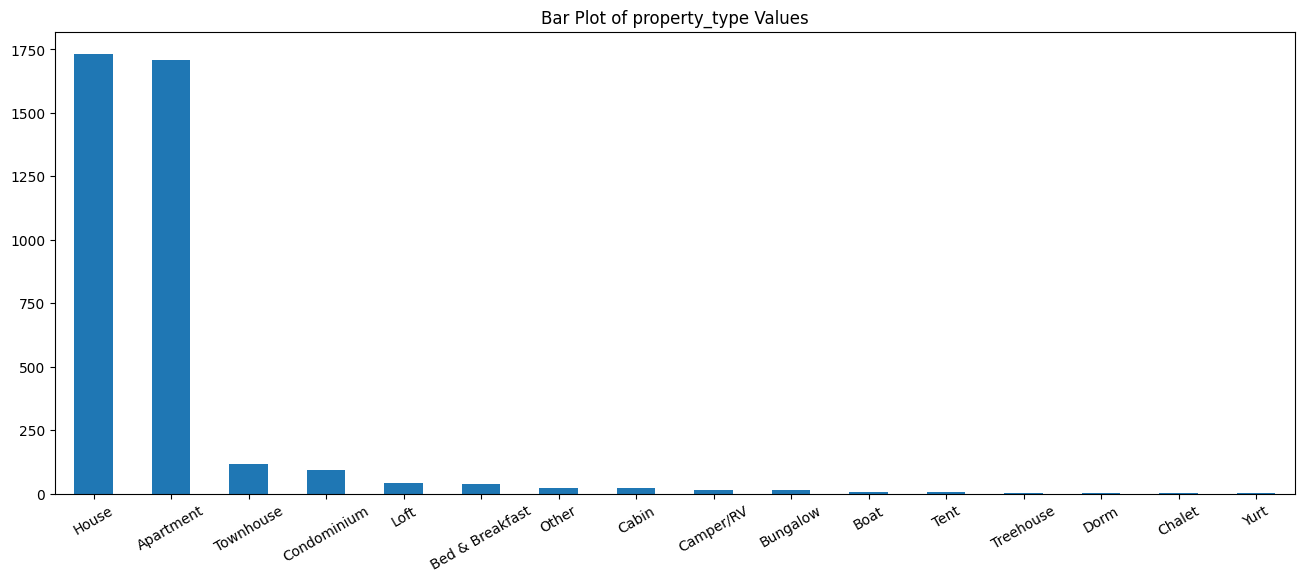

In [10]:
listings['property_type'].value_counts().plot.bar(rot=30, figsize=(16, 6))
plt.title('Bar Plot of property_type Values')
plt.show()

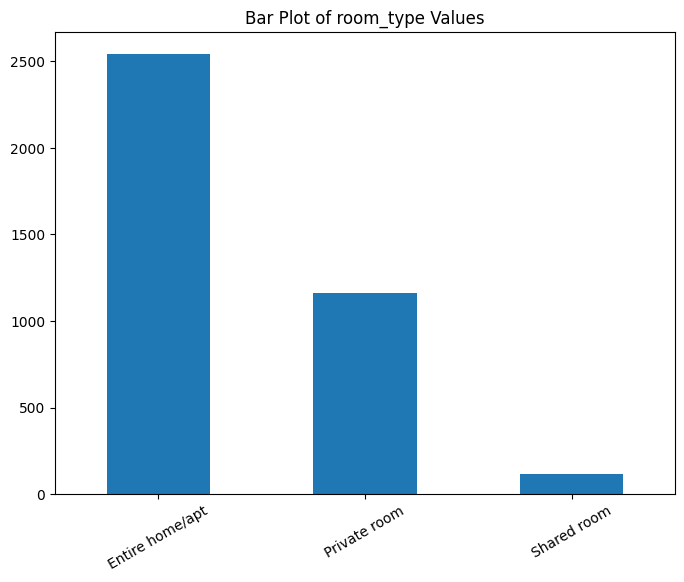

In [11]:
listings['room_type'].value_counts().plot.bar(rot=30, figsize=(8, 6))
plt.title('Bar Plot of room_type Values')
plt.show()

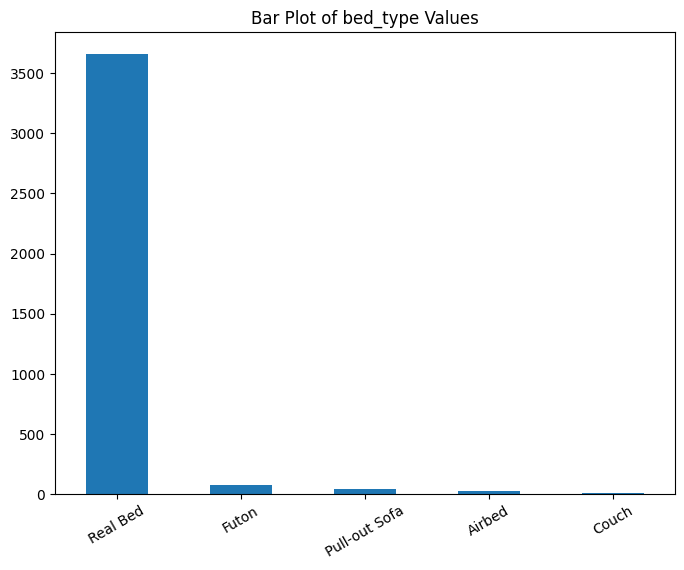

In [12]:
listings['bed_type'].value_counts().plot.bar(rot=30, figsize=(8, 6))
plt.title('Bar Plot of bed_type Values')
plt.show()

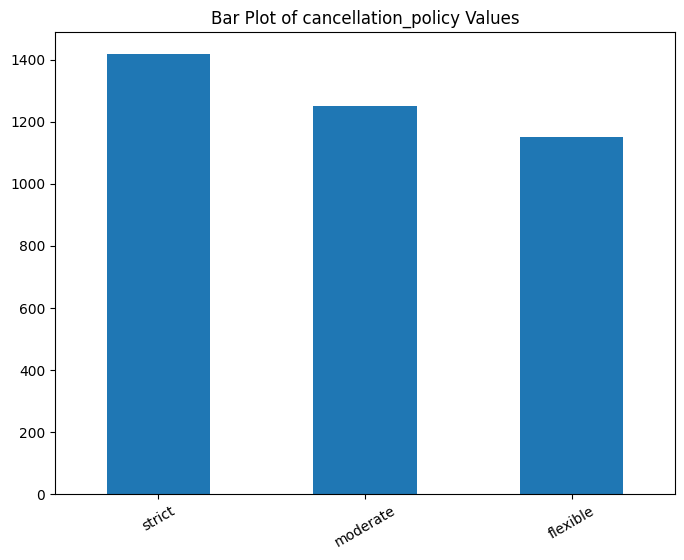

In [13]:
listings['cancellation_policy'].value_counts().plot.bar(rot=30, figsize=(8, 6))
plt.title('Bar Plot of cancellation_policy Values')
plt.show()

In [14]:
# Cleaning & EDA for Calendar.csv file 

# Load csv file into df
calendar_full = pd.read_csv("calendar.csv")

# Select csv into df
calendar_stats = calendar_full.describe()
print(calendar_stats)

# Convert column data types
calendar_full['date'] = pd.to_datetime(calendar_full['date'])
calendar_full['price'] = calendar_full['price'].str.replace('$', '').str.replace(',', '').astype(float)
print(calendar_full.info())
print(len(calendar_full))

# Investigate null values
print(calendar_full.notna().all(axis=1).sum())
calendar = calendar_full.dropna()

         listing_id
count  1.393570e+06
mean   5.550111e+06
std    2.962274e+06
min    3.335000e+03
25%    3.258213e+06
50%    6.118244e+06
75%    8.035212e+06
max    1.034016e+07


<ipython-input-14-9be308e48565>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_full['price'] = calendar_full['price'].str.replace('$', '').str.replace(',', '').astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB
None
1393570
934542


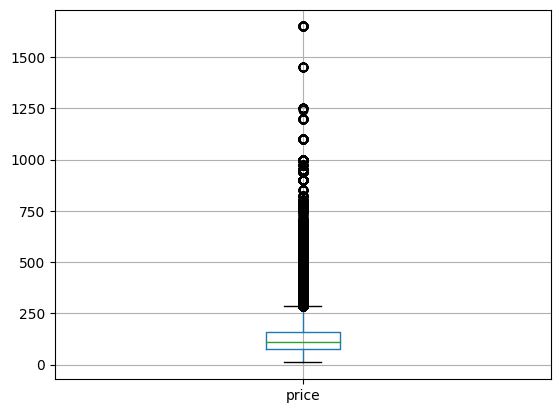

In [15]:
# Boxplot of price
calendar_full.boxplot('price')
plt.show()

70
781


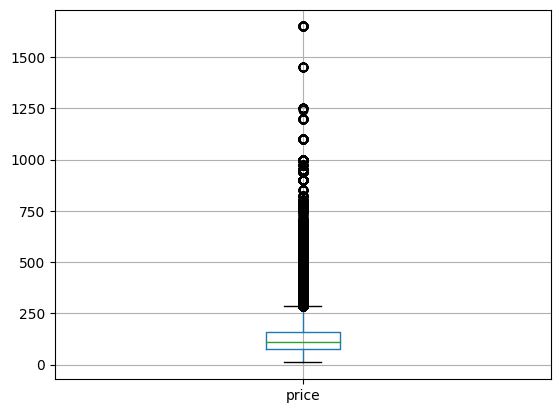

287.5
66000


In [16]:
# Cleaning & EDA for Reviews.csv file 

reviews = pd.read_csv("reviews.csv")

# merge the Reviews and Listings dataframes based on the common column 'listing_id'
merged_df = pd.merge(reviews, listings[['id', 'review_scores_rating']], how='left', left_on='listing_id', right_on='id')
print(len(listings[listings['review_scores_rating'] < 80]))
print(len(listings[listings['review_scores_rating'] == 100]))

# join the listings and calendar dataframes to add property_type column to calendar df
merged = pd.merge(calendar, listings, how='left', left_on='listing_id', right_on='id')
merged.drop(['id', 'price_y'], axis=1, inplace=True)
merged.rename(columns={'listing_id': 'id', 'price_x': 'price'}, inplace=True)
calendar_df = merged[['id', 'date', 'price', 'property_type']]

# Boxplot of price
calendar_df.boxplot('price')
plt.show()

Q1_calendar = calendar_df['price'].quantile(q=0.25)
Q3_calendar = calendar_df['price'].quantile(q=0.75)
IQR_calendar = Q3_calendar - Q1_calendar
top_whisker_calendar = Q3_calendar + 1.5*IQR_calendar
bottom_whisker_calendar = Q1_calendar - 1.5*IQR_calendar
outliers_calendar = calendar_df[calendar_df['price'] > top_whisker_calendar]
print(top_whisker_calendar)
print(len(outliers_calendar))

calendar_df_cleaned = calendar_df[calendar_df['price'] <= top_whisker_calendar]

In [17]:
# Research Question 1

# Average price per weekday

# Add weekday column to df
calendar_df_cleaned['weekday'] = calendar_df_cleaned['date'].dt.weekday

# Calculate avg price per weekday
grouped = calendar_df_cleaned.groupby(['weekday']).mean().reset_index()
grouped['weekday'] = grouped['weekday'].apply(lambda x: cd.day_name[x])
grouped['price_rounded'] = grouped['price'].round(2)

# Plot interactive barplot
fig = go.Figure(layout=dict(title='Average Airbnb Price in Seattle per Weekday', xaxis_title='Weekday', yaxis_title='Average Price'))
fig.add_trace(go.Bar(x=grouped['weekday'], y=grouped['price'], text=grouped['price_rounded'], textposition='auto'))
fig.show()



<ipython-input-17-e61151389bb6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_df_cleaned['weekday'] = calendar_df_cleaned['date'].dt.weekday
<ipython-input-17-e61151389bb6>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = calendar_df_cleaned.groupby(['weekday']).mean().reset_index()


In [18]:
# Average price per weekday by property type

# Calculate avg price per weekday & property type
grouped = calendar_df_cleaned.groupby(['property_type', 'weekday']).mean().reset_index()
grouped['weekday'] = grouped['weekday'].apply(lambda x: cd.day_name[x])

freq = calendar_df_cleaned['property_type'].value_counts().to_dict()
sorted_types = sorted(freq, key=freq.get, reverse=True)
grouped['price_formatted'] = grouped['price'].apply(lambda x: f"{x:.2f}")

# Plot interactive grouped barplot 
fig = go.Figure(layout=dict(title='Average Airbnb Price in Seattle per Weekday by Property Type',
                            xaxis_title='Weekday', yaxis_title='Average Price',
                            xaxis=dict(type='category'),  # set x-axis type to 'category'
                            legend=dict(title='Property Type', orientation='v',
                                        yanchor='top', xanchor='right',
                                        x=1.2, y=1.0)))
for i, prop_type in enumerate(sorted_types):
    visible = 'legendonly' if i > 0 else True
    prop_type_data = grouped[grouped['property_type'] == prop_type]
    fig.add_trace(go.Bar(x=prop_type_data['weekday'], y=prop_type_data['price'], name=prop_type, visible=visible,
                         text=prop_type_data['price_formatted'], textposition='auto'))
fig.show()




<ipython-input-18-356c6b4b4fd6>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [19]:
# Research Question 2

# Average price per month

# Add month column to df
calendar_df_cleaned['month'] = calendar_df_cleaned['date'].dt.month

# Calculate avg price per month
grouped = calendar_df_cleaned.groupby(['month']).mean().reset_index()
grouped['month'] = grouped['month'].apply(lambda x: cd.month_name[x])
grouped['price_rounded'] = grouped['price'].round(2)

# Plot interactive line plot
fig = go.Figure(layout=dict(title='Average Airbnb Price in Seattle per Month', xaxis_title='Month', yaxis_title='Average Price'))
fig.add_trace(go.Scatter(x=grouped['month'], y=grouped['price'], mode='lines+markers',
                         text=grouped['price_rounded'], textposition='top center'))
fig.update_layout(yaxis_range=[0, grouped['price'].max() + 50])
fig.show()

# Calculate avg price per month & property type
grouped = calendar_df_cleaned.groupby(['property_type', 'month']).mean().reset_index()
grouped['month'] = grouped['month'].apply(lambda x: cd.month_name[x])

freq = calendar_df_cleaned['property_type'].value_counts().to_dict()
sorted_types = sorted(freq, key=freq.get, reverse=True)
grouped['price_formatted'] = grouped['price'].apply(lambda x: f"{x:.2f}")

# Plot interactive line plot
fig = go.Figure(layout=dict(title='Average Airbnb Price in Seattle per Month by Property Type',
                            xaxis_title='Month', yaxis_title='Average Price',
                            xaxis=dict(type='category'),  # set x-axis type to 'category'
                            legend=dict(title='Property Type', orientation='v',
                                        yanchor='top', xanchor='right',
                                        x=1.2, y=1.0)))
for i, prop_type in enumerate(sorted_types):
    visible = 'legendonly' if i > 0 else True
    prop_type_data = grouped[grouped['property_type'] == prop_type]
    fig.add_trace(go.Scatter(x=prop_type_data['month'], y=prop_type_data['price'], name=prop_type, mode='lines+markers', visible=visible,
                         text=prop_type_data['price_formatted'], textposition='top center'))
fig.update_layout(yaxis=dict(range=[0, grouped['price'].max() * 1.1]))
fig.show()

<ipython-input-19-60cf2323bd60>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-60cf2323bd60>:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-19-60cf2323bd60>:21: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [20]:
# Research Question 3

# Airbnb prices per neighborhood (regardless of property type)
listings_cleaned = listings[listings['price'] <= top_whisker]
fig = px.scatter_mapbox(listings_cleaned, lat='latitude', lon='longitude', 
                        color='price', size_max=5, 
                        color_continuous_scale='YlGnBu', 
                        zoom=10, mapbox_style='carto-positron',
                        title = 'Airbnb Price Map (Regardless of Property Type)')
fig.update_layout(height=800)
fig.show()



In [21]:
# Airbnb prices per neighborhood (Houses)
fig = px.scatter_mapbox(listings_cleaned[listings_cleaned['property_type'] == 'House'], lat='latitude', lon='longitude', 
                        color='price', size_max=5, 
                        color_continuous_scale='YlGnBu', 
                        zoom=10, mapbox_style='carto-positron',
                        title = 'Airbnb Price Map (Houses)')
fig.update_layout(height=800)
fig.show()



In [22]:
# Airbnb prices per neighborhood (Apartments)
fig = px.scatter_mapbox(listings_cleaned[listings_cleaned['property_type'] == 'Apartment'], lat='latitude', lon='longitude', 
                        color='price', size_max=5, 
                        color_continuous_scale='YlGnBu', 
                        zoom=10, mapbox_style='carto-positron',
                        title = 'Airbnb Price Map (Apartments)')
fig.update_layout(height=800)
fig.show()

<ipython-input-23-6a940ca53b7f>:7: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



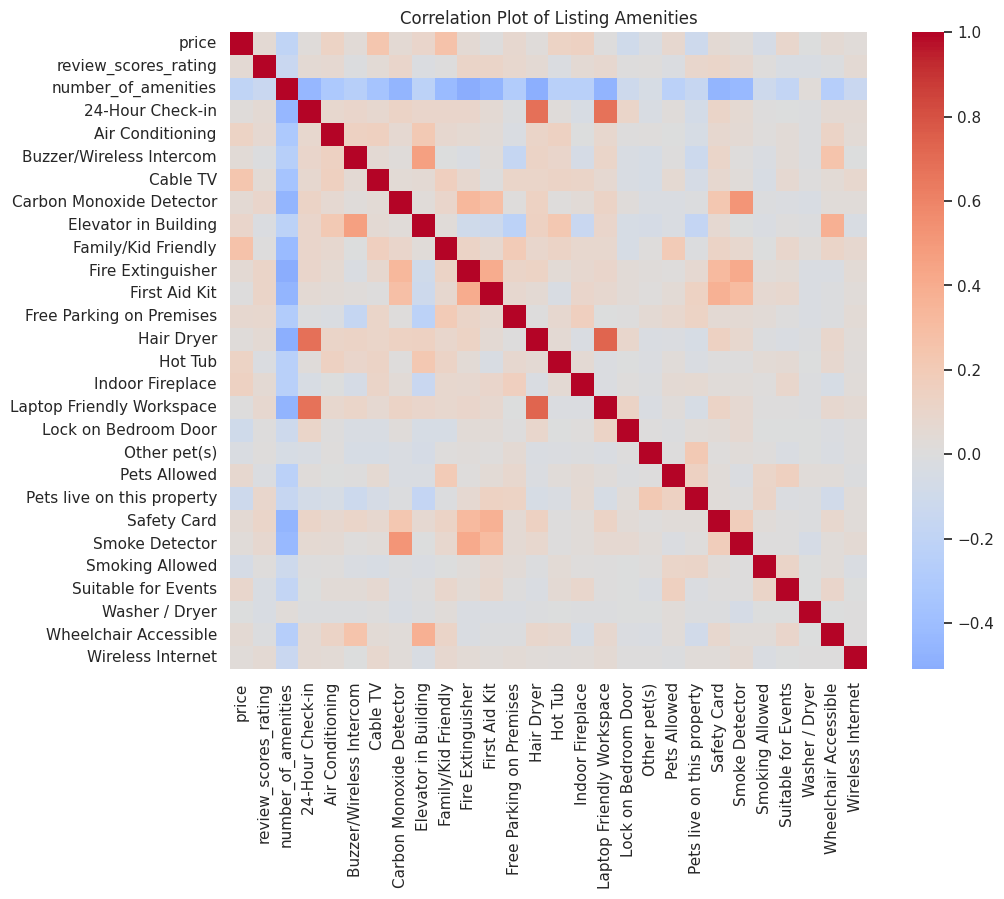

In [23]:
# Research Question 4

# Effect of Amenities on Price & Ratings

# One-hot encode amenities
amenities = listings['amenities'].str.extractall(r'"([^"]*)"')[0].unstack().fillna('')
dummies = pd.get_dummies(amenities.apply(pd.Series).stack()).sum(level=0)
listing_amenities = listings[['price', 'review_scores_rating']].join(dummies)
listing_amenities = listing_amenities.rename(columns={'':'number_of_amenities'})
listing_amenities.head(10)

# Plot heatmap of correlation bw amenities, prices, ratings
listing_amenities_corr = listing_amenities.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(listing_amenities_corr,
    # annot=True,
    cmap=sns.color_palette("coolwarm", as_cmap=True),
    center=0,
    square=True)
plt.title('Correlation Plot of Listing Amenities')
plt.show()



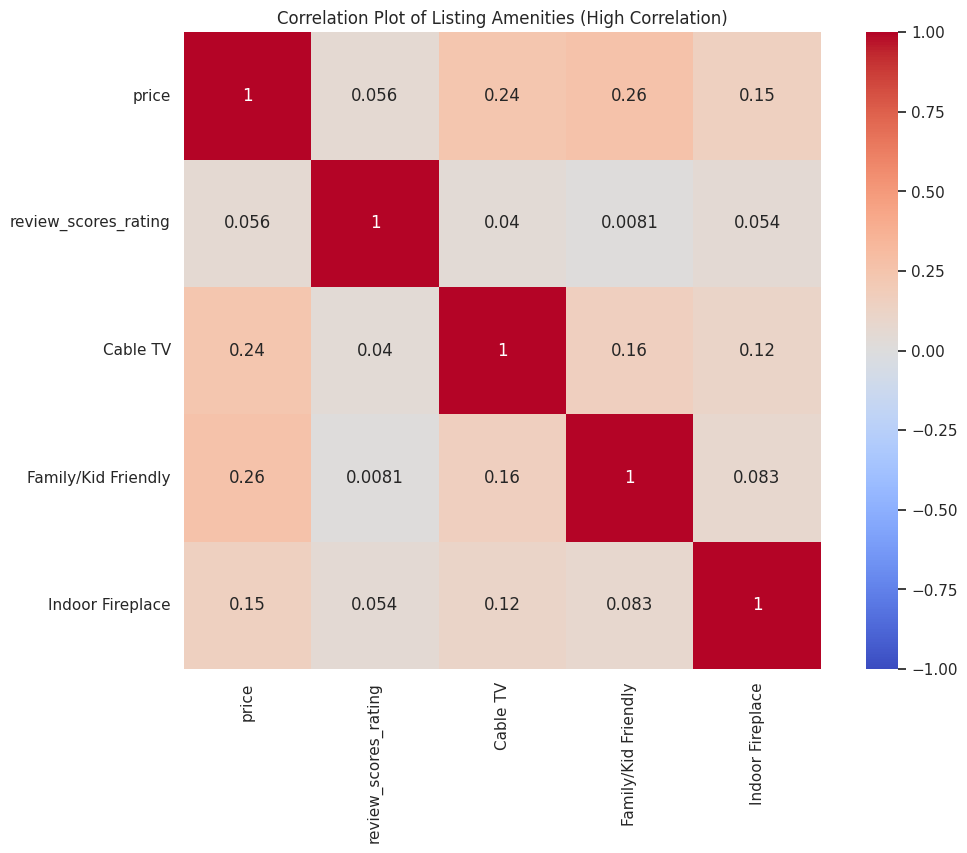

In [24]:
# Find highly correlated items
high_corr_cols = []
for col in listing_amenities_corr.columns:
    if (listing_amenities_corr['price'][col] > 0.14) or (listing_amenities_corr['review_scores_rating'][col] > 0.14):
        high_corr_cols.append(col)
high_corr_df = listing_amenities[high_corr_cols]

# Plot heatmap of highly correlated items
sns.heatmap(high_corr_df.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.color_palette("coolwarm", as_cmap=True),
    annot=True,
    square=True)
plt.title('Correlation Plot of Listing Amenities (High Correlation)')
plt.show()



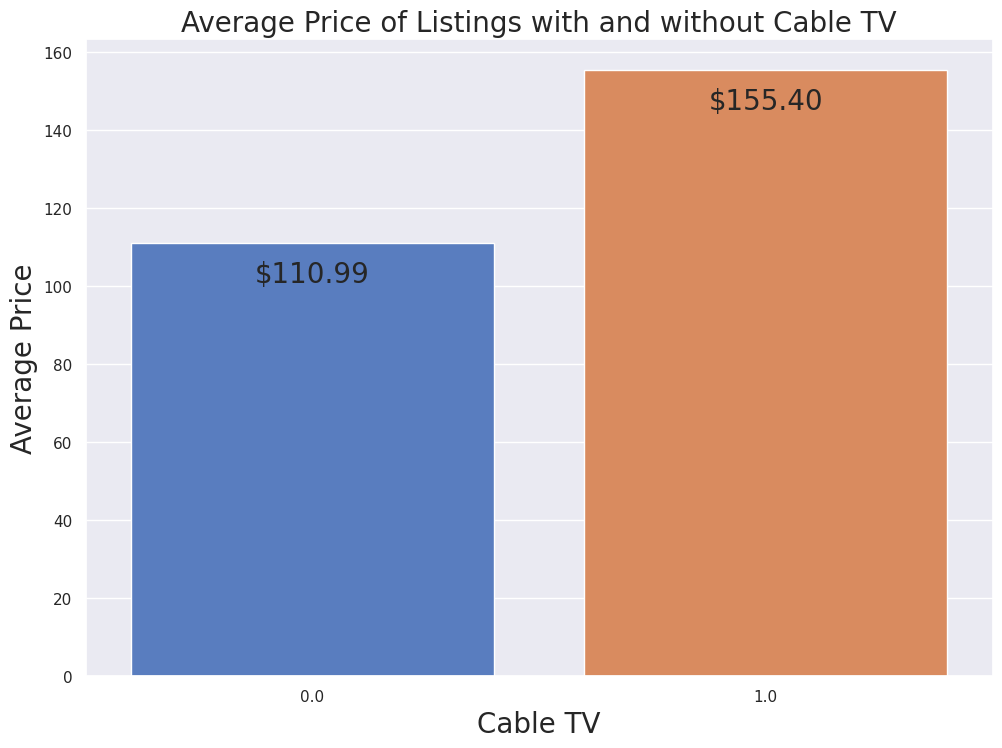

In [25]:
# Plot barplot of Cable TV & Price 
grouped = listing_amenities.groupby('Cable TV')['price'].mean().reset_index()
sns.set_palette("muted")
sns.barplot(x='Cable TV', y='price', data=grouped)
plt.xlabel('Cable TV', fontsize=20)
plt.ylabel('Average Price', fontsize=20)
plt.title('Average Price of Listings with and without Cable TV', fontsize=20)
for i in range(2): # Labels
    mean_price = listing_amenities[listing_amenities['Cable TV'] == i]['price'].mean()
    plt.text(i, mean_price-10, f"${mean_price:.2f}", ha='center', fontsize=20)
plt.show()



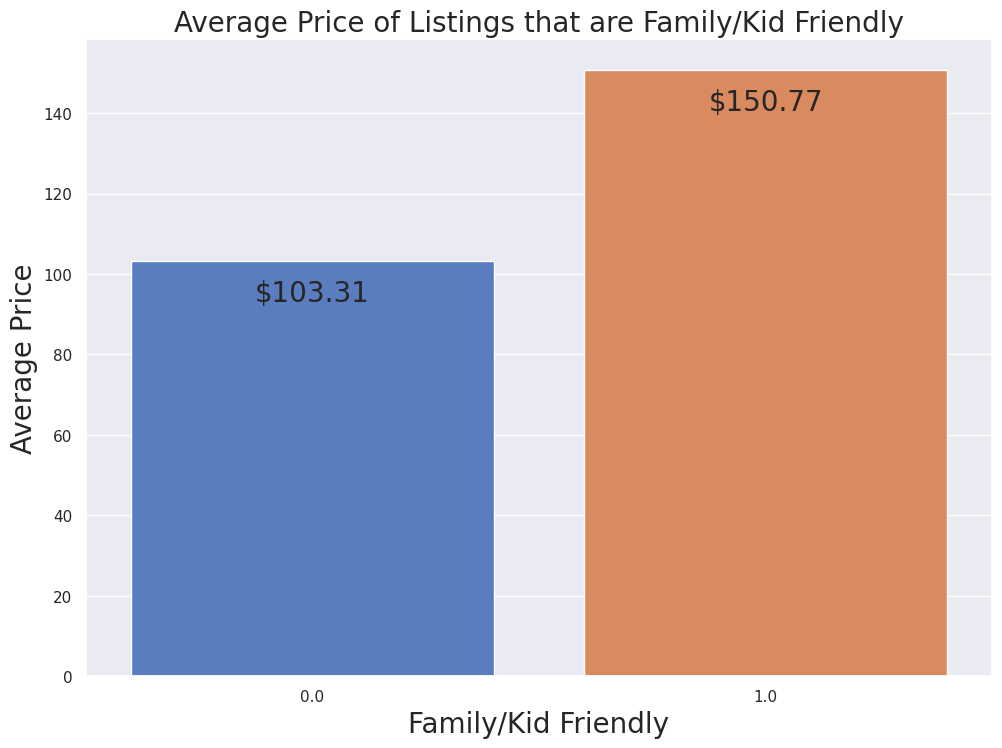

In [26]:
# Plot barplot of Family/Kid Friendly & Price 
grouped = listing_amenities.groupby('Family/Kid Friendly')['price'].mean().reset_index()
sns.set_palette("muted")
sns.barplot(x='Family/Kid Friendly', y='price', data=grouped)
plt.xlabel('Family/Kid Friendly', fontsize=20)
plt.ylabel('Average Price', fontsize=20)
plt.title('Average Price of Listings that are Family/Kid Friendly', fontsize=20)
for i in range(2): # Labels
    mean_price = listing_amenities[listing_amenities['Family/Kid Friendly'] == i]['price'].mean()
    plt.text(i, mean_price-10, f"${mean_price:.2f}", ha='center', fontsize=20)
plt.show()



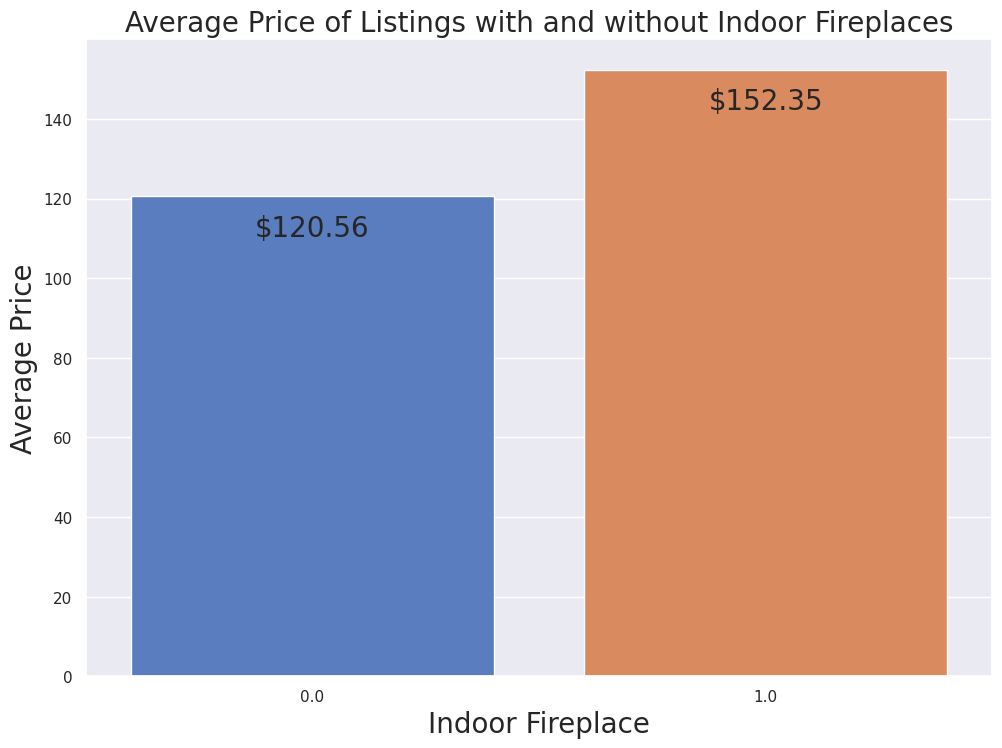

In [27]:
# Plot barplot of Indoor Fireplaces & Price 
grouped = listing_amenities.groupby('Indoor Fireplace')['price'].mean().reset_index()
sns.set_palette("muted")
sns.barplot(x='Indoor Fireplace', y='price', data=grouped)
plt.xlabel('Indoor Fireplace', fontsize=20)
plt.ylabel('Average Price', fontsize=20)
plt.title('Average Price of Listings with and without Indoor Fireplaces', fontsize=20)
for i in range(2): # Labels
    mean_price = listing_amenities[listing_amenities['Indoor Fireplace'] == i]['price'].mean()
    plt.text(i, mean_price-10, f"${mean_price:.2f}", ha='center', fontsize=20)
plt.show()

<ipython-input-28-bd585b6aedfd>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


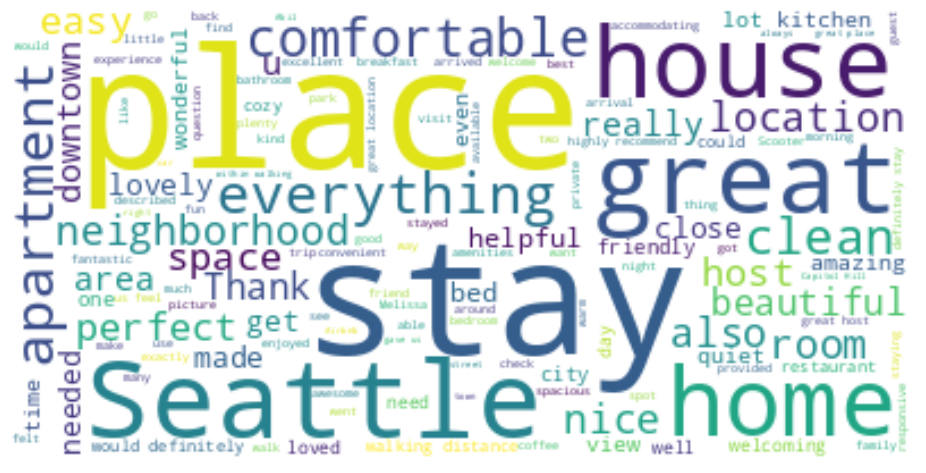

In [28]:
# Research Question 5 (Part 1)

# Word cloud of best reviews

# filter rows with rating of 100
high_rating_reviews = merged_df[merged_df['review_scores_rating'] == 100]

# convert comments column to string and replace missing values with empty string
high_rating_reviews['comments'] = high_rating_reviews['comments'].astype(str).replace('nan', '')

# concatenate comments into a single string
text = ' '.join(high_rating_reviews['comments'].values.tolist())

# generate wordcloud
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

# plot wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<ipython-input-29-42435d3da504>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



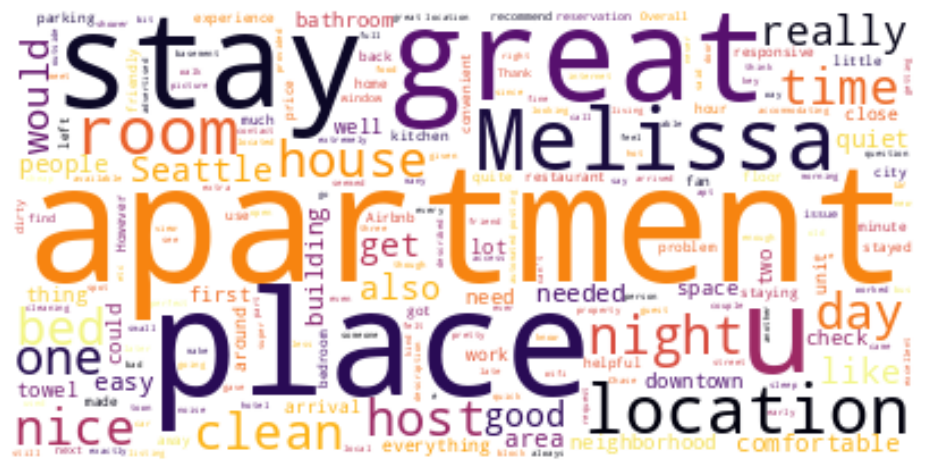

In [29]:
# Word cloud of worst reviews

# filter rows with rating < 80
low_rating_reviews = merged_df[merged_df['review_scores_rating'] <75]

# convert comments column to string and replace missing values with empty string
low_rating_reviews['comments'] = low_rating_reviews['comments'].astype(str).replace('nan', '')

# concatenate comments into a single string
text = ' '.join(low_rating_reviews['comments'].values.tolist())

# generate wordcloud
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_words, background_color="white", colormap="inferno").generate(text)

# plot wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# Research Question 5 (Part 2)

listing_reviews = listings[['id', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

# Filter data for listings with non-null review scores and select 5 listings with different ratings
filtered_df = listing_reviews.dropna(subset=["review_scores_rating"])
filtered_df = filtered_df.sort_values("review_scores_rating").reset_index(drop=True)
ids = filtered_df.loc[[0, 200, 400, 600, 800], "id"].values.tolist()

# Define the columns to use for the radar plot
columns = ["review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin",
           "review_scores_communication", "review_scores_location", "review_scores_value"]

# Define the custom labels for each variable
labels = ["Accuracy", "Cleanliness", "Check-in", "Communication", "Location", "Value"]

# Create the interactive radar plots
figs = []
for i in range(5):
    # Filter the data for the selected id
    filtered_data = listing_reviews[listing_reviews["id"] == ids[i]]
    # Create the radar plot
    fig = px.line_polar(filtered_data, theta=columns, r=filtered_data[columns].values[0],
                        line_close=True, title=f"Review Scores for Listing {ids[i]}",)
    # Set the axis labels using update_traces()
    fig.update_traces(name='',selector=dict(type='scatterpolar'))
    fig.update_layout(
        polar=dict(
            angularaxis=dict(
                tickmode='array',
                tickvals=list(range(len(labels))),
                ticktext=labels,
                direction="clockwise",
            ),
        ),
    )
    figs.append(fig)

# Show the plots
for fig in figs:
    fig.show()


/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co